# Boston house price prediction using xgboost

In [1]:
import pandas as pd
import numpy as np

## Load Boston data

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.target.shape

(506,)

## Convert the data into DataFrame

In [6]:
df= pd.DataFrame(boston.data, columns= boston.feature_names)  #13 feature available
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.shape

(506, 13)

In [8]:
# include the target inthe dataframe
df['Price'] = boston.target

In [9]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [10]:
df.shape

(506, 14)

In [11]:
df.describe()  # statistical measure of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Preprocessing the data

In [13]:
# check for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## EDA

<AxesSubplot:>

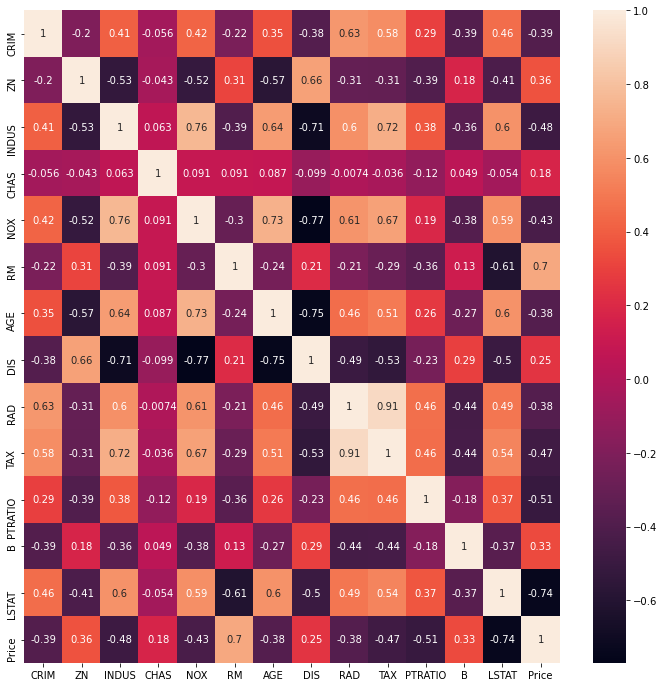

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot= True)  # correlation b/w them

## Unimodal Data Visualization

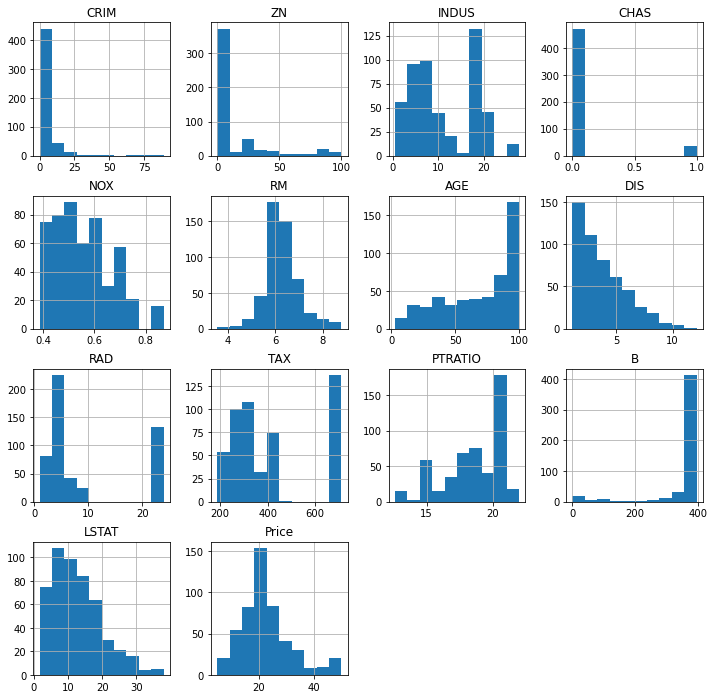

In [15]:
# histograms
df.hist(figsize=(12,12));

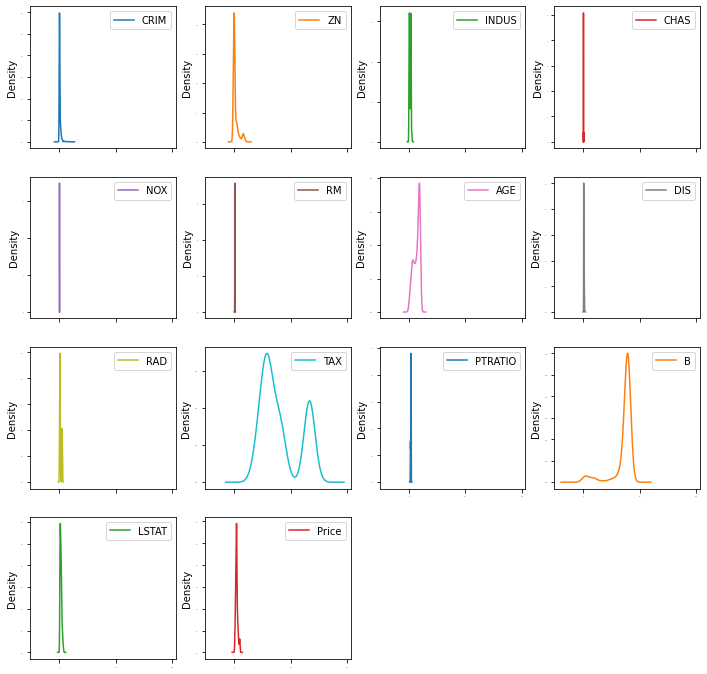

In [16]:
# density plots
df.plot(kind='density', subplots=True, layout=(4,4), fontsize=1, figsize=(12,12));

## Split the data and target

In [17]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [18]:
X.shape

(506, 13)

In [19]:
y.shape

(506,)

## Split the data Train & Test data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 2)

In [21]:
print(X.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(506, 13)
(404, 13)
(404,)
(102, 13)
(102,)


## Model Training

In [25]:
from sklearn import metrics
import xgboost as xgr
from xgboost import XGBRegressor

In [26]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluation

### Prediction and accuracy

In [30]:
model.predict(X_test)

array([20.288406 , 20.60247  , 30.9758   , 29.910797 ,  8.624953 ,
       14.235525 , 23.523052 , 29.730324 , 31.97293  , 22.015892 ,
       27.946804 , 24.034412 , 20.771402 , 21.849985 , 12.024127 ,
       22.074675 , 18.487509 , 11.052485 ,  8.141267 , 15.730722 ,
       23.163914 , 20.233883 , 35.700928 , 19.041637 , 15.129744 ,
       20.228016 , 47.067314 , 30.426474 , 32.729023 , 17.345776 ,
       17.889462 , 19.40687  , 30.769133 , 25.431686 , 12.05332  ,
       17.900238 , 11.031679 , 21.109531 , 20.64321  , 21.982754 ,
       25.016281 , 12.648555 , 31.042107 ,  7.106914 , 18.685764 ,
       14.380013 , 34.902393 , 16.130005 , 32.98537  , 10.950912 ,
       27.335018 , 29.399937 ,  7.0065055, 35.398712 , 22.978228 ,
       18.582758 , 19.224293 , 20.003431 , 15.341814 , 22.38517  ,
       19.077105 , 21.955967 , 18.91404  , 32.77595  , 32.76772  ,
       24.36317  , 48.262913 , 23.385014 , 10.551914 , 22.664684 ,
       14.671612 ,  8.881822 , 16.700302 , 17.221045 , 26.2046

In [31]:
y_test

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
200    32.9
12     21.7
129    14.3
194    29.1
320    23.8
Name: Price, Length: 102, dtype: float64

In [32]:
model.score(X_test, y_test,)  #Accuracy of model

0.8711660369151691

In [43]:
y_pred_train = model.predict(X_train)

### Error

In [44]:
# R-square error
score_1 = metrics.r2_score(y_train, y_pred_train )

# mean absolute error
score_2 = metrics.r2_score(y_train, y_pred_train )
print("R-square error",score_1)
print("mean absolute error", score_2)

R-square error 0.9999948236320982
mean absolute error 0.9999948236320982


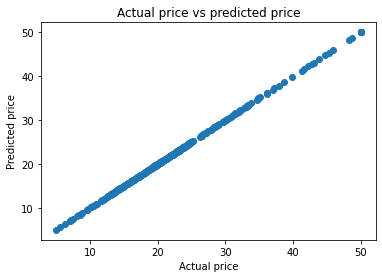

In [47]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted price")
plt.show()

In [48]:
#Prediction test data
# accuracy for prediction data
y_pred_test = model.predict(X_test)

score_1 = metrics.r2_score(y_test, y_pred_test )

# mean absolute error
score_2 = metrics.r2_score(y_test, y_pred_test )
print("R-square error",score_1)
print("mean absolute error", score_2)

R-square error 0.8711660369151691
mean absolute error 0.8711660369151691
